# **Pymaceuticals Inc.**

### **Analysis**
- The bar graph showed the drugs Regimen and Capomulin has a higher total of tested mice, and Zoniferol has the smaller       number of tested mice.We had to remove duplicates, so the total number of mice is 248. The total count of mice by gender   also showed that roughly half of the mice were male and half female.

- The correlation between mouse weight, and average tumor volume is 0.84. It shows this, when the mouse weight increases     the average tumor volume also increases.

- The regression line analysis showed how much the average tumor volume will change when weight of mice change.

- Out of all treatments, the Boxplot graph shows that Capomulin and Ramicane reduces the size of tumors better.

In [1]:
# Add Depencencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'Mouse_metadata.csv'
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single DataFrame

merged_data_df = pd.merge(mouse_metadata_path, study_results_path, how = "right")
# Display the data table for preview
merged_data_df = merged_data_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

merged_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = len(merged_data_df["Mouse ID"].unique())

num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mice_df = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merged_data_df[merged_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

num_mice = len(clean_merge_df["Mouse ID"].unique())

num_mice

248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_group_mean = clean_merge_df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']
regimen_group_median = clean_merge_df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']
regimen_group_variance = clean_merge_df.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']
regimen_group_std = clean_merge_df.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']
regimen_group_sem = clean_merge_df.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

summary_stats_regimen = pd.DataFrame({'Mean Tumor Volume':regimen_group_mean,
                                      'Median Tumor Volume':regimen_group_median,
                                      'Tumor Volume Variance':regimen_group_variance,
                                      'Tumor Volume Std. Dev.':regimen_group_std,
                                      'Tumor Volume Std. Err.':regimen_group_sem})

summary_stats_regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg= clean_merge_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

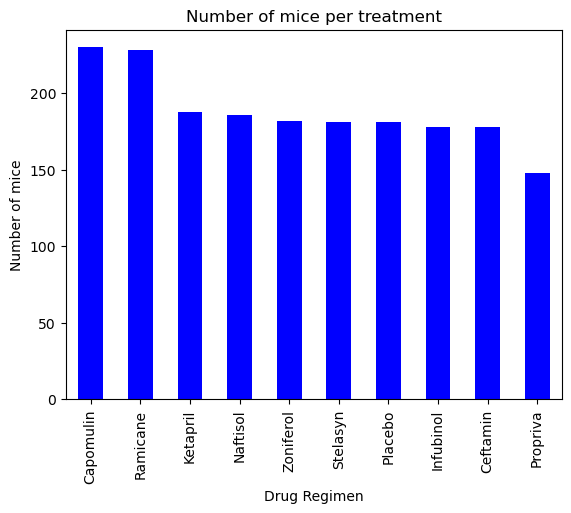

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_id_count = clean_merge_df['Drug Regimen'].value_counts()

Bar_chart = mice_id_count.plot.bar(color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice')
plt.title('Number of mice per treatment')
plt.show()
                            

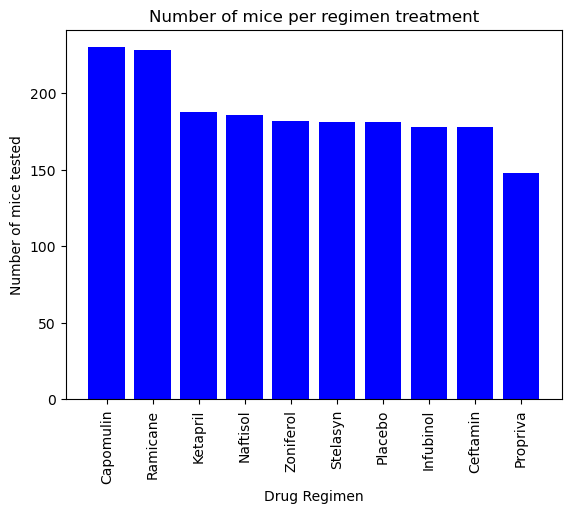

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_id_count.index.values
y_axis = mice_id_count.values

plt.bar(x_axis, y_axis, color='blue', align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.xticks(rotation='vertical')
plt.title('Number of mice per regimen treatment')

plt.show()

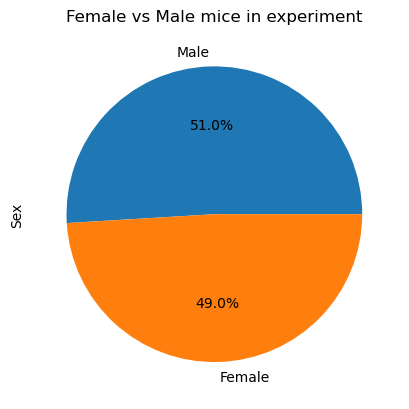

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_merge_df['Sex'].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title('Female vs Male mice in experiment')
plt.show()

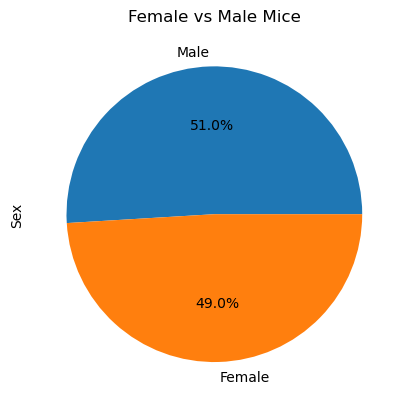

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female', 'Male']
gender_pie = sex_data.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title("Female vs Male Mice")

plt.show()


# Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_merge_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_ms_data = max_tumor.merge(clean_merge_df, on=["Mouse ID",'Timepoint'], how="left")
merge_ms_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tu_vol= merge_ms_data.loc[merge_ms_data['Drug Regimen']==drug, 'Tumor Volume (mm3)']

        # add subset 
    tumor_vol_data.append(final_tu_vol)

        # Determine outliers using upper and lower bounds
    quartiles = final_tu_vol.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    print(drug)
    print(quart_range)
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    print(lower_bound,upper_bound)
    outliers = final_tu_vol.loc[(final_tu_vol < lower_bound) | (final_tu_vol > upper_bound)]
    print(outliers)
    print('------------')

Capomulin
7.781863460000004
20.70456164999999 51.83201549
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------
Ramicane
9.098536719999998
17.912664470000003 54.30681135
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------
Infubinol
11.477135160000003
36.83290494999999 82.74144559000001
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------
Ceftamin
15.577752179999997
25.355449580000002 87.66645829999999
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------


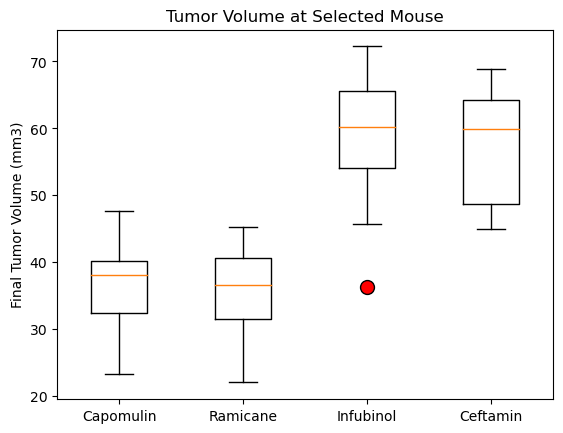

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot(tumor_vol_data, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

# Line and Scatter Plots

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = clean_merge_df.loc[clean_merge_df['Mouse ID'] == 's185']
mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


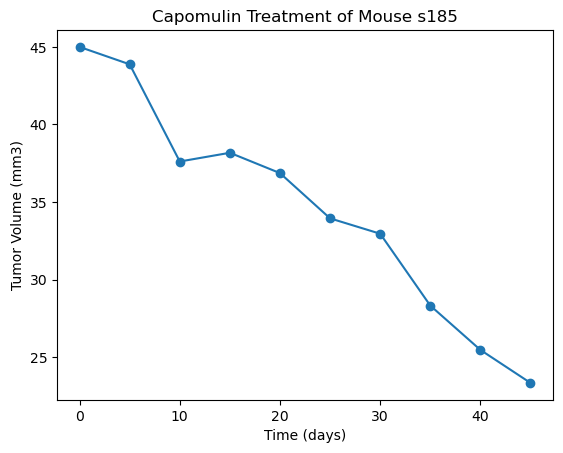

In [42]:
mouse = clean_merge_df.loc[clean_merge_df['Mouse ID'] == 's185']


plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

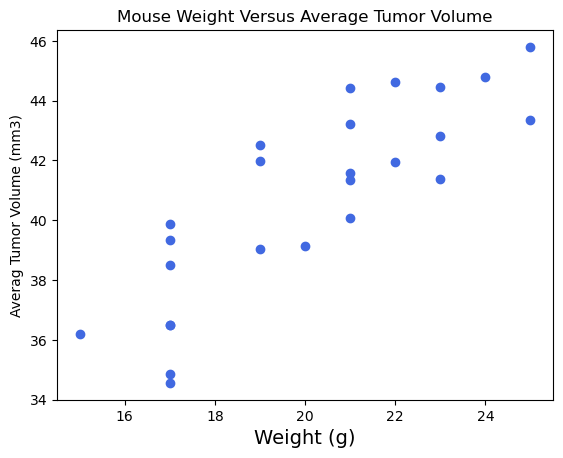

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_merge_df.loc[clean_merge_df['Drug Regimen'] == 'Capomulin']

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()



# Correlation and Regression

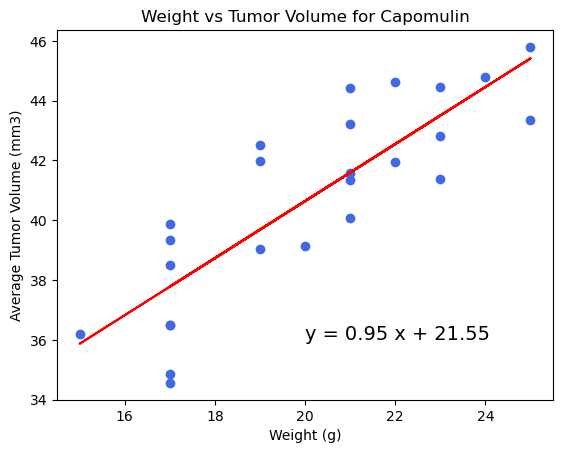

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

